In [296]:
import pygad
import numpy as np
import math
import random
import time
import matplotlib.pyplot as plt
import pants

# Rozwiązanie problemu komiwojażera za pomocą algorytmu genetycznego.

Losujemy "miasta"(punkty na płaszczyźnie). Następnie przyporządkowujemy każdemu miastu swój numer. Wybieramy także nasz punkt początkowy oraz punkt końcowy(w naszym przypadku oba takie same. Uzależniliśmy także wielkość obszaru, na którym mogą się znajdować nasze miasta od ilości miast.

In [405]:
miasta=[]
gene_space=[i for i in range(1,41)]

miasta=[(random.uniform(1,len(gene_space)),random.uniform(1,len(gene_space))) for i in range(len(gene_space))]
miasta
slownik=dict(zip(gene_space,miasta))
start = [(random.uniform(1,1),random.uniform(1,1))]
end = [(random.uniform(1,1),random.uniform(1,1))]


W następnym kroku deklarujemy funkcje fitness. W naszym przypadku będzie to odległość pomiędzy miastem i-tym,
a miastem i+1-tym w chromosomie. Zapisujemy nasze odległości w liście. Następnie odległości sumujemy i zmieniamy znak,
ponieważ szukamy maksimum (najmniejszej sumy odległości).

In [372]:
def odleglosc(a, b):
    return math.sqrt(pow(a[1] - b[1], 2) + pow(a[0] - b[0], 2))

def fit_function(solution, solution_idx):
    trasy=[]
    
    MS=[]
    MS.append(start)
    for i in range(len(solution)):
        MS.append(slownik[solution[i]])
    MS.append(koniec)
    
    for i in range(len(MS)-1):
        trasy.append(odleglosc(MS[i],MS[i+1]))
    fitness=-np.sum(trasy)
    return fitness

fitness_function=fit_function

W tym fragmencie kodu deklarujemy zmienne jakie będą użyte podczas inicjaci algorytmu genetycznego. Ustawiam dużą ilość
generacji ze względu na ilość kombinacji w naszym problemie. Testowałem różne opcje selekcji rodziców jak i typu mutacji.
Najlepsze rozwiązaia dawał stały typ selekcji, oraz mutacja losowa. Sprawdziłem także, że krzyżowanie osobników w naszym 
przypadku daje gorsze rozwiązania, więc nie uwzględniłem go w algorytmie.

In [373]:
sol_per_pop = 40
num_genes = len(miasta)

num_parents_mating = 20
num_generations = 800
keep_parents = 8

parent_selection_type = "sss"

#usunięto aby wyniki były lepsze.
#crossover_type = "single_point"

#zmieniamy procent genów w zależności od długości chromosomu.
mutation_type = "random"
mutation_percent_genes = 6

ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
#                      crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       stop_criteria="saturate_100",
                       mutation_percent_genes=mutation_percent_genes,
                       allow_duplicate_genes=False)

W tej części uruchamiamy algorytm oraz printujemy znalezione rozwiązanie. Best solution pokazuje nam najmniejszą odlgłość jaką znalazł nasz algorytm. Wykres pokazuje jak z czasem zmieniała się nasza suma odległości.

Parameters of the best solution : [16. 31. 19. 38. 18. 17.  7. 33. 30. 12.  8.  3. 34. 37. 22. 14. 25. 26.
 36. 15. 23.  1.  5. 29. 39. 24. 32. 28. 20.  2. 35. 40.  6.  4. 11. 10.
  9. 13. 27. 21.]
Fitness value of the best solution = -277.18361744281424
Number of generations passed is: 662


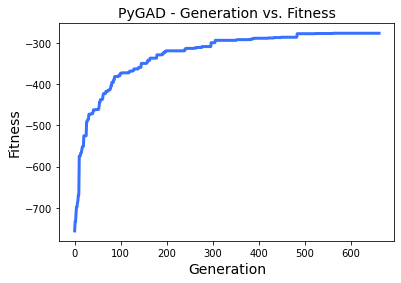

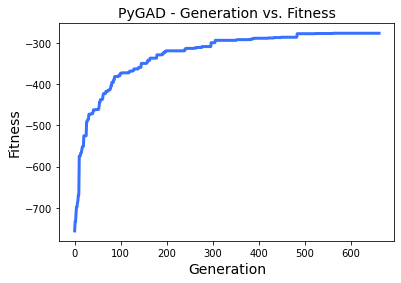

In [374]:
ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Number of generations passed is: {generations_completed}".format(generations_completed=ga_instance.generations_completed))
#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()

Poniżej pokazane są dwa wykresy. Pierwszy pokazuje jak wyglądają nasze "miasta" na płaszczyźnie. Drugi pokazuje już połączone krawędziami "miasta".

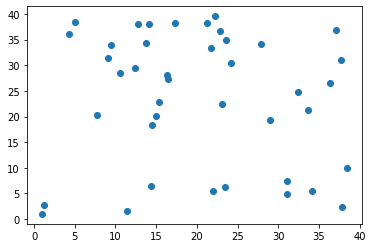

In [375]:
x=[1]
y=[1]
for i in range(len(miasta)):
    x.append(miasta[i][0])
    y.append(miasta[i][1])
plt.scatter(x, y)

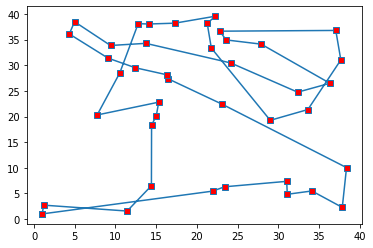

In [376]:
x=[start[0]]
y=[start[1]]
for i in range(len(solution)):
    x.append(slownik[solution[i]][0])
    y.append(slownik[solution[i]][1])
x.append(koniec[0])
y.append(koniec[1])
plt.plot(x, y, marker = 's', markersize = 6 ,markerfacecolor='red')

Obliczamy średnią długość trwania naszego algorytmu dla 40 miast.

In [274]:
czasy=[]
for i in range(10):
    st=time.time()
    ga_instance.run()
    end=time.time()
    czasy.append(end-st)
    print(f"Czas pracowania algorytmu to: {round(end-st,4)} sekund.")
cz1=round(np.mean(czasy),4)
print(f"Średnia czasów wynosi: {cz1}")

Czas pracowania algorytmu to: 1.2726 sekund.
Czas pracowania algorytmu to: 0.8065 sekund.
Czas pracowania algorytmu to: 0.805 sekund.
Czas pracowania algorytmu to: 0.8054 sekund.
Czas pracowania algorytmu to: 0.806 sekund.
Czas pracowania algorytmu to: 0.8268 sekund.
Czas pracowania algorytmu to: 0.8036 sekund.
Czas pracowania algorytmu to: 0.811 sekund.
Czas pracowania algorytmu to: 0.799 sekund.
Czas pracowania algorytmu to: 0.8022 sekund.
Średnia czasów wynosi: 0.8538


W poniższym kodzie zwiększymy podwoimy liczbę miast i sprawdzimy jaki będzie to miało wpływ na szybkość  działania algorytmu.

In [393]:
miasta=[]
gene_space=[i for i in range(1,81)]

miasta=[(random.randint(1,len(gene_space)),random.randint(1,len(gene_space))) for i in range(len(gene_space))]

slownik=dict(zip(gene_space,miasta))
start = (1,1)
koniec = (1,1)

def fit_function(solution, solution_idx):
    trasy=[]
    
    MS=[]
    MS.append(start)
    for i in range(len(solution)):
        MS.append(slownik[solution[i]])
    MS.append(koniec)
    
    for i in range(len(MS)-1):
        trasy.append(odleglosc(MS[i],MS[i+1]))
    fitness=-np.sum(trasy)
    return fitness

fitness_function=fit_function

sol_per_pop = 80
num_genes = 80

num_parents_mating = 20
num_generations = 800
keep_parents = 8

parent_selection_type = "sss"

#usunięto aby wyniki były lepsze.
#crossover_type = "single_point"

#zmieniamy procent genów w zależności od długości chromosomu.
mutation_type = "random"
mutation_percent_genes = 6

ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
#                      crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       stop_criteria="saturate_100",
                       mutation_percent_genes=mutation_percent_genes,
                       allow_duplicate_genes=False)
ga_instance.run()

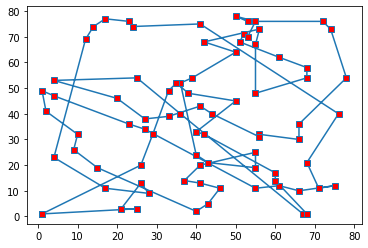

In [394]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
x=[start[0]]
y=[start[1]]
for i in range(len(solution)):
    x.append(slownik[solution[i]][0])
    y.append(slownik[solution[i]][1])
x.append(koniec[0])
y.append(koniec[1])
plt.plot(x, y, marker = 's', markersize = 6 ,markerfacecolor='red')

Jak widać podwojenie miast w tym przypadku zwiększyło średni czas pracy algorytmu o parenaście sekund. Oznacza to, że czas działania wydłuzył się wielokrotnie przy tylko dwukrotnym powiększeniu. Dla większych problemów algorytm genetyczny może mieć problemy, aby w optymalnym czasie znaleźć rozwiązanie.


Poniżej wizualizacja, jak wyglądają połącznie między miastami.

In [395]:
czasy=[]
for i in range(10):
    st=time.time()
    ga_instance.run()
    end=time.time()
    czasy.append(end-st)
    print(f"Czas pracowania algorytmu to: {round(end-st,4)} sekund.")
cz2=round(np.mean(czasy),4)
print(f"Średnia czasów wynosi: {cz2}")

Czas pracowania algorytmu to: 16.7635 sekund.
Czas pracowania algorytmu to: 7.426 sekund.
Czas pracowania algorytmu to: 31.8821 sekund.
Czas pracowania algorytmu to: 4.3656 sekund.
Czas pracowania algorytmu to: 4.3482 sekund.
Czas pracowania algorytmu to: 7.2442 sekund.
Czas pracowania algorytmu to: 4.3461 sekund.
Czas pracowania algorytmu to: 6.819 sekund.
Czas pracowania algorytmu to: 26.8943 sekund.
Czas pracowania algorytmu to: 4.3198 sekund.
Średnia czasów wynosi: 11.4409


# Rozwiązanie problemu komiwojażera za pomocą algorytmu mrówkowego.

In [383]:
import pants
import math
import random

miasta1=start+miasta

world = pants.World(miasta1, odleglosc,close=True) #dodajemy close jeśli chcemy aby punkt początkowy był również końcowym.
solver = pants.Solver()
solution = solver.solve(world)

print(solution.distance)



292.33742241205647


Algorytm próbuje znaleźć najkrótszą drogę pomiędzy wszystkimi punktami. Funckja pants.world tworzy odległości(krawędzie) pomiędzy punktami. Następnie używamy solver.solve, aby algorytm znalazł nam najlepszą drogę.

Poniżej wizualizacja problemu.

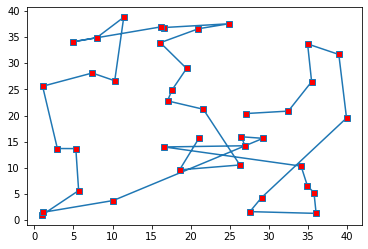

In [384]:
x1=[]
y1=[]
for i in range(40):
    x1.append(solution.tour[i][0])
    y1.append(solution.tour[i][1])
plt.plot(x1, y1, marker = 's', markersize = 6 ,markerfacecolor='red')

In [370]:
czasy=[]
for i in range(10):
    st=time.time()
    solution = solver.solve(world)
    end=time.time()
    czasy.append(end-st)
    print(f"Czas pracowania algorytmu to: {round(end-st,4)} sekund.")
cz3=round(np.mean(czasy),4)
print(f"Średnia czasów wynosi: {cz3}")

Czas pracowania algorytmu to: 0.8925 sekund.
Czas pracowania algorytmu to: 0.8788 sekund.
Czas pracowania algorytmu to: 0.8713 sekund.
Czas pracowania algorytmu to: 0.8717 sekund.
Czas pracowania algorytmu to: 0.8931 sekund.
Czas pracowania algorytmu to: 0.8811 sekund.
Czas pracowania algorytmu to: 0.8862 sekund.
Czas pracowania algorytmu to: 0.8747 sekund.
Czas pracowania algorytmu to: 0.8748 sekund.
Czas pracowania algorytmu to: 0.8713 sekund.
Średnia czasów wynosi: 0.8795


Średni czas szukania jest porównywalny z algorytmem genetycznym.

<BarContainer object of 3 artists>

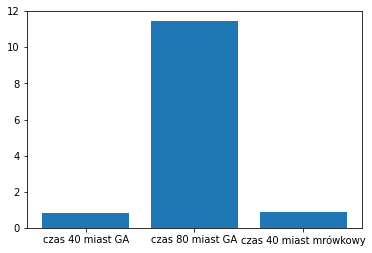

In [404]:
plt.bar(["czas 40 miast GA","czas 80 miast GA","czas 40 miast mrówkowy"],[cz1,cz2,cz3])

# Bibliografia:

https://acopy.readthedocs.io/en/latest/api.html#module-acopy  
https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html   
https://aco-pants.readthedocs.io/en/stable/
